# Sum of 1 to *n*

*Michel Wermelinger*, 22 January 2024, last updated 16 March 2024

This short notebook provides a very simple example of an [algorithmic essay](https://dsa-ou.github.io/algoesup) and 
shows the support that our library provides.

The problem to be solved is to compute the sum of the integers, 1, 2, ..., *n*,
for some given *n*. Two solutions will be presented, both only using basic Python.

The first thing to do is to import the necessary functions from the algorithmic essays support library.
The functions will be explained later, when they're used.

In [1]:
import os

if 'COLAB_GPU' in os.environ:  # if we are in Google Colab...
    !pip install algoesup --no-deps
    !pip install allowed ruff

In [2]:
# import functions to test the code and to measure the execution time
from algoesup import test, time_functions_int

The library also includes two commands to turn on the tools that will check the code as it's executed.
There won't be any messages in this notebook because the code passes all checks.

In [3]:
%load_ext algoesup.magics
# check the code for style violations
%ruff on
# check that only the subset of Python taught in our introductory course TM112 is used
%allowed on --config tm112.json

ruff was activated
allowed was activated


## Tests

Before thinking of a solution, it's best to write down some tests, as they help our understanding of the problem.
Each test is the input integer *n* and the corresponding expected integer output 1 + 2 + ... + *n*.

The tests should include **edge cases**: inputs that are extreme values or that lead to extreme outputs.
For this problem, edge cases are when there are no integers to add up (*n* < 1) or when there's only one (*n* = 1).

Tests should also include normal cases. When the input is an integer, tests typically include odd and even values.

The `test` function that was imported in the previous cell expects the tests to be written as a table,
e.g. as a list of lists. The table must have one row per test case. Each row has a column with a string describing the case, 
one column per input, and a final column with the expected output. 

In [4]:
tests = [
    # case            n,    sum
    ["no integers",  -1,      0],
    ["one integer",   1,      1],
    ["n is even",     4,     10],  # 1 + 2 + 3 + 4 = 10
    ["n is odd",      7,     28],  # 1 + 2 + 3 + 4 + 5 + 6 + 7 = 28
]

## Solutions
The next step is to think of possible algorithms that solve the problem.

### Using a loop
The probably most obvious algorithm is to explicitly calculate the sum, 
by iterating over the integers from 1 to *n*. 

> **Algorithm 1**:
> Set the total to zero. For each value from 1 to *n*, add the value to the total.
> Return the total.

The algorithm is implemented as follows.

In [5]:
def sum_with_loop(n):
    """Return 1 + 2 + ... + n, using a loop."""
    total = 0
    for number in range(1, n + 1):
        total = total + number
    return total

The next step is to check the code with the imported `test` function, which 
takes two arguments: the function to be tested and a test table.
Every test case in the test table is checked and if the actual output isn't the expected output,
the test is reported as having failed.

In [6]:
test(sum_with_loop, tests)

Testing sum_with_loop...
Tests finished: 4 passed, 0 failed.


Algorithm 1 passes all tests.
Since the algorithm does exactly what the problem asks for,
the only test that could fail is for *n* < 1. However, in that case 
the loop is skipped and the returned total is zero, as desired.

### Using a formula
It's possible to compute the sum directly, using a well-known formula, 
taught in many introductory math courses:

1 + 2 + 3 + ... + (*n* - 2) + (*n* - 1) + *n* =
(1 + n) + (2 + *n* - 1) + (3 + n - 2) + ... = 
(n + 1) · n / 2.

The formula is based on 'pairing up' the first with the last number, 
the second with the next to last, and so on. Each pair adds up to *n* + 1,
and the number of pairs is half of *n*. The algorithm is simply the formula:

> **Algorithm 2**:
> Return *n* · (*n*+1) / 2.

In [7]:
def sum_with_formula(n):
    """Return 1 + 2 + ... + n, using a formula."""
    return n * (n + 1) // 2

This function is solving the same problem as the previous one, so it must be tested with the exact same tests.

In [8]:
test(sum_with_formula, tests)

Testing sum_with_formula...
Tests finished: 4 passed, 0 failed.


The code passes the tests, and yet the algorithm is wrong! 
The formula is only meant for *n* ≥ 1. It just happens that if *n* = 0 or *n* = -1
then *n* · (*n*+1) / 2 = 0, as desired, but for *n* < -1 the result is non-zero.
An additional test helps confirm this.

In [9]:
tests.append(["n < -1", -5, 0])  # testing with n = -5

test(sum_with_formula, tests)

Testing sum_with_formula...
n < -1 FAILED: 10 instead of 0
Tests finished: 4 passed, 1 failed.


The result is -5 · (–5 + 1) / 2 = -5 · -4 / 2 = 10 instead of zero. The algorithm must be modified.

> **Algorithm 2 (corrected)**:
> If *n* < 1, return 0, otherwise return *n* · (*n*+1) / 2.

In [10]:
def sum_with_formula(n):
    """Return 1 + 2 + ... + n, using a formula."""
    if n < 1:
        return 0
    else:
        return n * (n + 1) // 2

test(sum_with_formula, tests)

Testing sum_with_formula...
Tests finished: 5 passed, 0 failed.


Now the additional test also passes. 

As a new test was added, the first algorithm must be tested again.

In [11]:
test(sum_with_loop, tests)

Testing sum_with_loop...
Tests finished: 5 passed, 0 failed.


## Performance

The final, optional, step is to compare the performance of both solutions to see which is fastest.
For this problem, the second algorithm is expected to be faster that the first one, 
as it computes the sum directly, without iterating over *n* integers.

The `time_functions_int` function, which was imported in the first cell,
takes a list of functions that have a single integer *n* as input, 
and measures their run-times for *n* = 1, 2, 4, 8, ..., 1024.
Doubling the input allows to see any trends in how run-times grow
with just eleven executions of the two functions.
Running the functions with *n* = 1, 2, 3, 4, 5, ..., 1024 would take much longer and 
not produce any additional insight.

Inputs generated by int_value

Input value   sum_with_loop sum_with_formul 
          1           231.0           133.3 ns
          2           246.4           133.6 ns
          4           283.3           132.6 ns
          8           358.8           133.0 ns
         16           517.6           156.5 ns
         32           910.5           151.5 ns
         64          1719.5           151.4 ns
        128          3363.5           150.4 ns
        256          6736.4           160.7 ns
        512         15009.1           158.3 ns
       1024         31162.0           165.2 ns

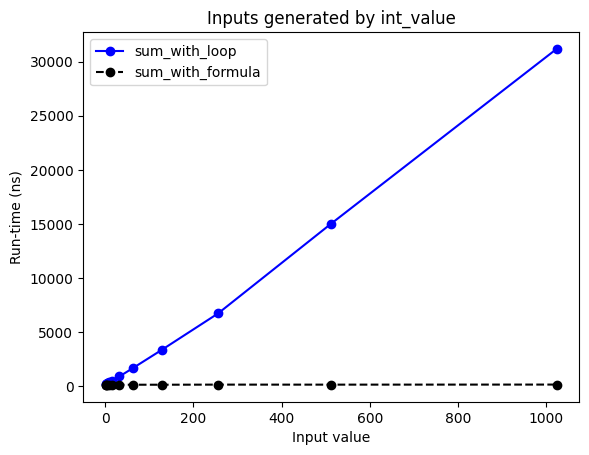

In [12]:
time_functions_int([sum_with_loop, sum_with_formula])

Computing the sum with the formula always takes about the same time,
around 90 to 100 nanoseconds (that's what the 'ns' means).
However, the run-times for the sum with the loop grow as *n* gets larger.
If the value of *n* doubles, the number of iterations also doubles,
so the run-time also roughly doubles, as can be seen above the chart.
As *n* increases, the iterative sum gets slower and slower.
At *n* = 1024, using a loop is about 200 times slower than using the formula!

## Concluding remarks
This essay presented two solutions to a simple problem: computing the sum 1 + ... + *n*, 
for any integer *n*. The sum should be zero if *n* < 1.

The first solution computes the sum iteratively, while the second computes it directly,
with a formula. The second is always faster, even for *n* = 1.
Moreover, as *n* increases, the first approach becomes slower whereas
the second always takes about the same time.

This essay illustrates the need for thinking about different algorithms for 
the same problem, as one approach may be much more efficient than others.

The essay also showed that passing all tests doesn't mean that the code is correct.
As the various algorithms are developed, new tests may have to be added.